In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

All the necessary libraries were imported.

In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\netflix1.csv')

df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


We checked the column variance using description syntax

In [6]:
df.describe(include='all').style.background_gradient(cmap='viridis')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,nan,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,nan,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,nan,3205,1791,362
mean,nan,nan,nan,nan,nan,nan,2014.183163,nan,nan,nan
std,nan,nan,nan,nan,nan,nan,8.825466,nan,nan,nan
min,nan,nan,nan,nan,nan,nan,1925.000000,nan,nan,nan
25%,nan,nan,nan,nan,nan,nan,2013.000000,nan,nan,nan
50%,nan,nan,nan,nan,nan,nan,2017.000000,nan,nan,nan
75%,nan,nan,nan,nan,nan,nan,2019.000000,nan,nan,nan


Checking the missing data

In [7]:
df.isnull().sum()/len(df)*100

show_id         0.0
type            0.0
title           0.0
director        0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
dtype: float64

No missing Data 

# Exploratory Data Analysis, EDA

In [8]:
df.head(4)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"


Checking columns uniqueness

In [10]:
for i in df.columns:
    print(df[i].unique())

['s1' 's3' 's6' ... 's8801' 's8784' 's8786']
['Movie' 'TV Show']
['Dick Johnson Is Dead' 'Ganglands' 'Midnight Mass' ...
 'Zindagi Gulzar Hai' 'Yoko' 'YOM']
['Kirsten Johnson' 'Julien Leclercq' 'Mike Flanagan' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
['United States' 'France' 'Brazil' 'United Kingdom' 'India' 'Germany'
 'Pakistan' 'Not Given' 'China' 'South Africa' 'Japan' 'Nigeria' 'Spain'
 'Philippines' 'Australia' 'Argentina' 'Canada' 'Hong Kong' 'Italy'
 'New Zealand' 'Egypt' 'Colombia' 'Mexico' 'Belgium' 'Switzerland'
 'Taiwan' 'Bulgaria' 'Poland' 'South Korea' 'Saudi Arabia' 'Thailand'
 'Indonesia' 'Kuwait' 'Malaysia' 'Vietnam' 'Lebanon' 'Romania' 'Syria'
 'United Arab Emirates' 'Sweden' 'Mauritius' 'Austria' 'Turkey'
 'Czech Republic' 'Cameroon' 'Netherlands' 'Ireland' 'Russia' 'Kenya'
 'Chile' 'Uruguay' 'Bangladesh' 'Portugal' 'Hungary' 'Norway' 'Singapore'
 'Iceland' 'Serbia' 'Namibia' 'Peru' 'Mozambique' 'Ghana' 'Zimbabwe'
 'Israel' 'Finland' 'Denmark' 'Paraguay' 

Spliting 'listed_in' column

In [11]:
df[['Movie_A','Movie_B','Movie_C']]=df['listed_in'].str.split(',',expand=True)

In [12]:
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Movie_A,Movie_B,Movie_C
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,Documentaries,None,None
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,None
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies


Checking the columns format of each table and bringing out month from the date

In [13]:
df['date_added']=pd.to_datetime(df['date_added'])

In [14]:
df['date_added']=pd.DatetimeIndex(df['date_added']).month_name()

In [15]:
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Movie_A,Movie_B,Movie_C
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,September,2020,PG-13,90 min,Documentaries,Documentaries,None,None
1,s3,TV Show,Ganglands,Julien Leclercq,France,September,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,September,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,September,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,None
4,s8,Movie,Sankofa,Haile Gerima,United States,September,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies


Renaming the date for visualiazation purpose.


In [84]:
df.rename(columns={'date_added':'Month'})

,show_id,Movie_type,title,director,country,Month_Name,release_year,rating,duration,listed_in,Movie_A,Movie_B,Movie_C
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,September,2020,PG-13,90 min,Documentaries,Documentaries,None,None
1,s3,TV Show,Ganglands,Julien Leclercq,France,September,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,September,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,September,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,None
4,s8,Movie,Sankofa,Haile Gerima,United States,September,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,January,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows,TV Dramas,None
8786,s8798,TV Show,Zak Storm,Not Given,United States,September,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV,None,None
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,December,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas
8788,s8784,TV Show,Yoko,Not Given,Pakistan,June,2016,TV-Y,1 Season,Kids' TV,Kids' TV,None,None


In [22]:
df=df.rename(columns={'type':'Movie_type'})

First visualization to check the Movie types.

Text(0.5, 1.0, 'Movie Types')

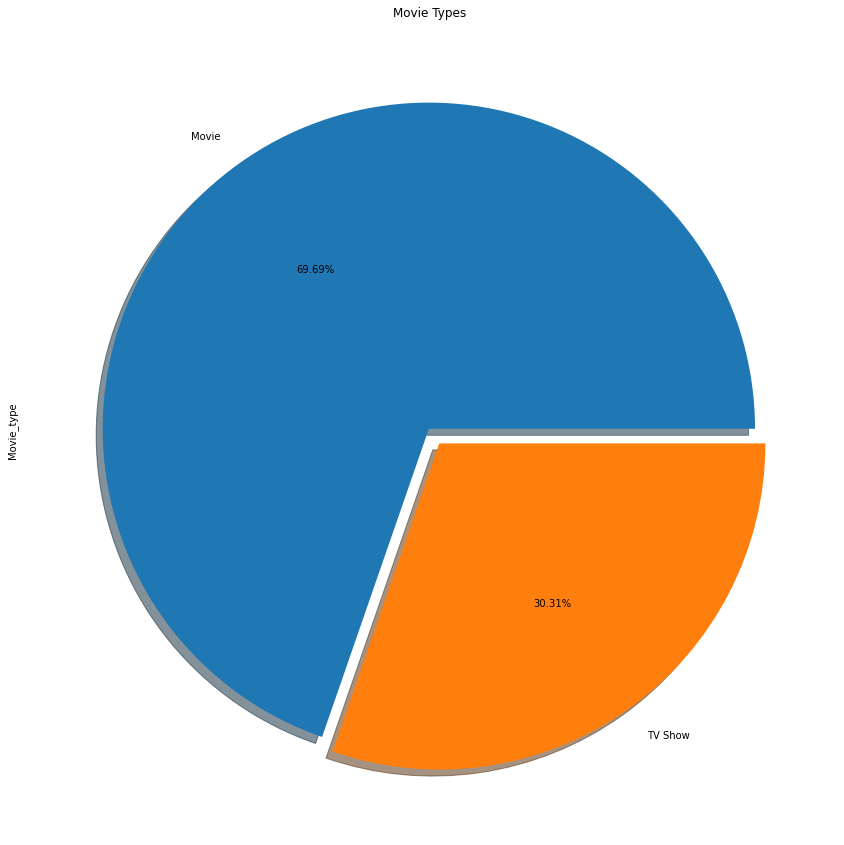

In [24]:
df['Movie_type'].value_counts().plot.pie(figsize=(15,15),autopct='%1.2f%%',explode=[0.005,0.05],shadow=True).set_title('Movie Types')

In [25]:
df.head(3)

,show_id,Movie_type,title,director,country,date_added,release_year,rating,duration,listed_in,Movie_A,Movie_B,Movie_C
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,September,2020,PG-13,90 min,Documentaries,Documentaries,None,None
1,s3,TV Show,Ganglands,Julien Leclercq,France,September,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,September,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries


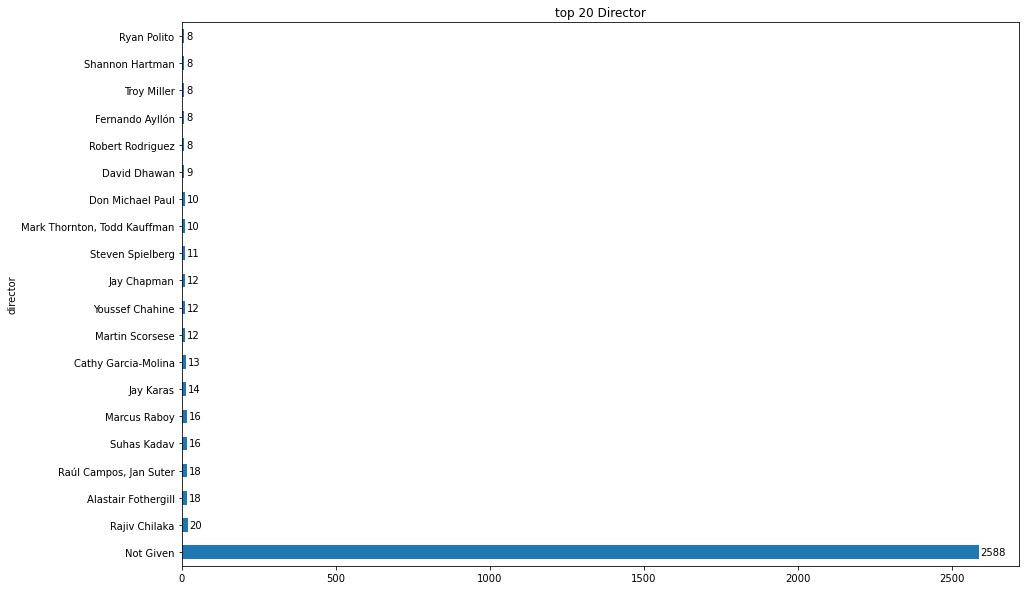

In [29]:
ax=df.groupby('director')['Movie_type'].count().sort_values(ascending=False)[:20].plot(kind='barh',figsize=(15,10))
plt.title('top 20 Directors')
for container in ax.containers:
    ax.bar_label(container,label_type='edge',padding=2)
    

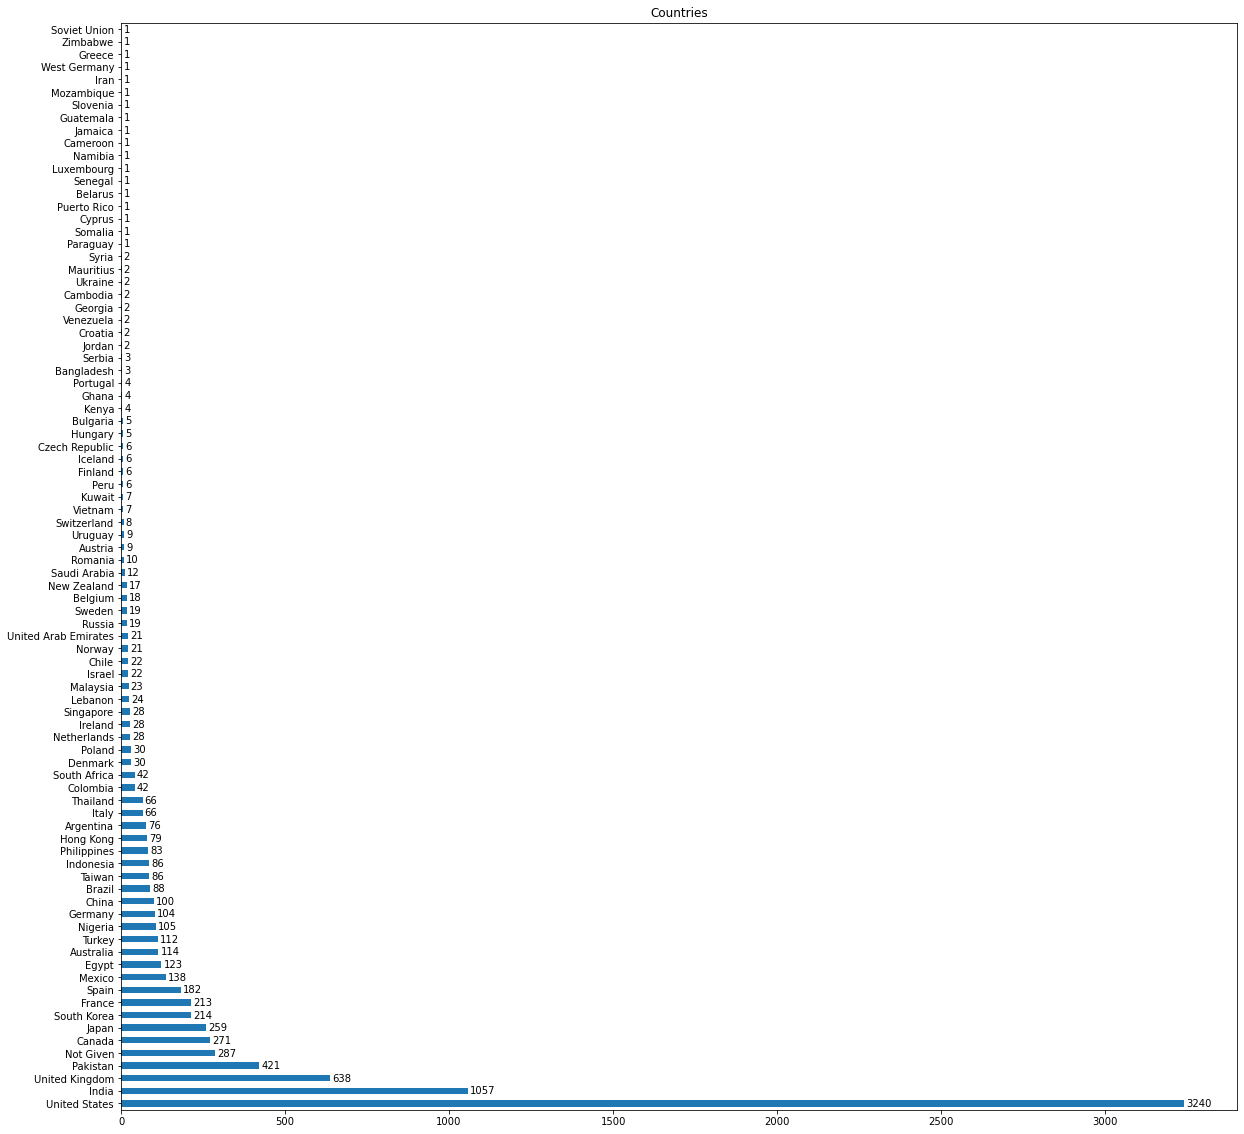

In [30]:
axes=df['country'].value_counts().plot(kind='barh',figsize=(20,20))
plt.title('Countries')
for container in axes.containers:
    axes.bar_label(container,label_type='edge',padding=2)

USA is rated the highest movie producer and viewership with 32240 followed by india with 1057.

In [31]:
df.head(3)

,show_id,Movie_type,title,director,country,date_added,release_year,rating,duration,listed_in,Movie_A,Movie_B,Movie_C
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,September,2020,PG-13,90 min,Documentaries,Documentaries,None,None
1,s3,TV Show,Ganglands,Julien Leclercq,France,September,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,September,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries


Rename 'Not Given'

In [33]:
df=df.rename(columns={'date_added':'Month_Name'})

In [34]:
df.head(3)

,show_id,Movie_type,title,director,country,Month_Name,release_year,rating,duration,listed_in,Movie_A,Movie_B,Movie_C
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,September,2020,PG-13,90 min,Documentaries,Documentaries,None,None
1,s3,TV Show,Ganglands,Julien Leclercq,France,September,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,September,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries


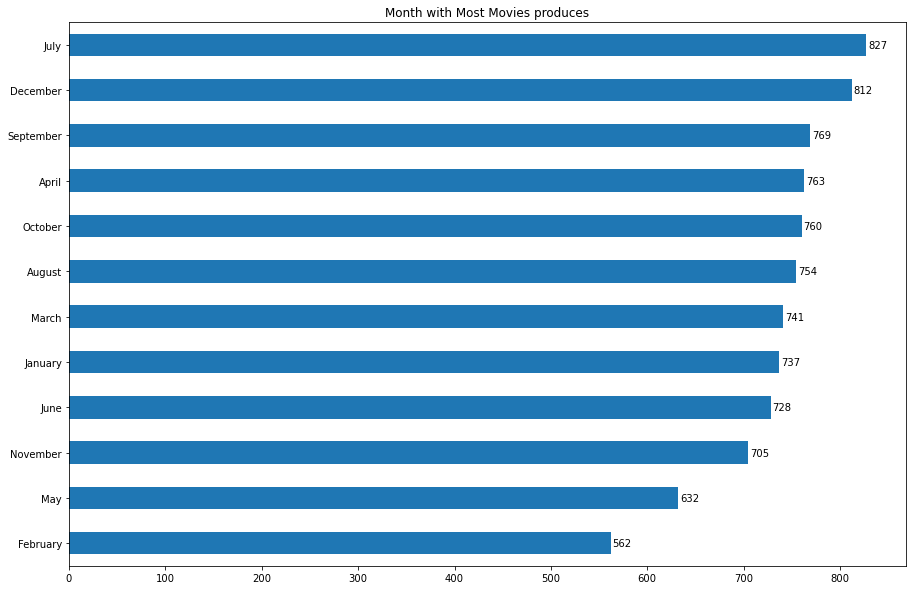

In [38]:
fig=df['Month_Name'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(15,10))
plt.title('Month with Most Movies produces')
for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=2)

In [ ]:
Plot for rating type
TV_MA took the lead. 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


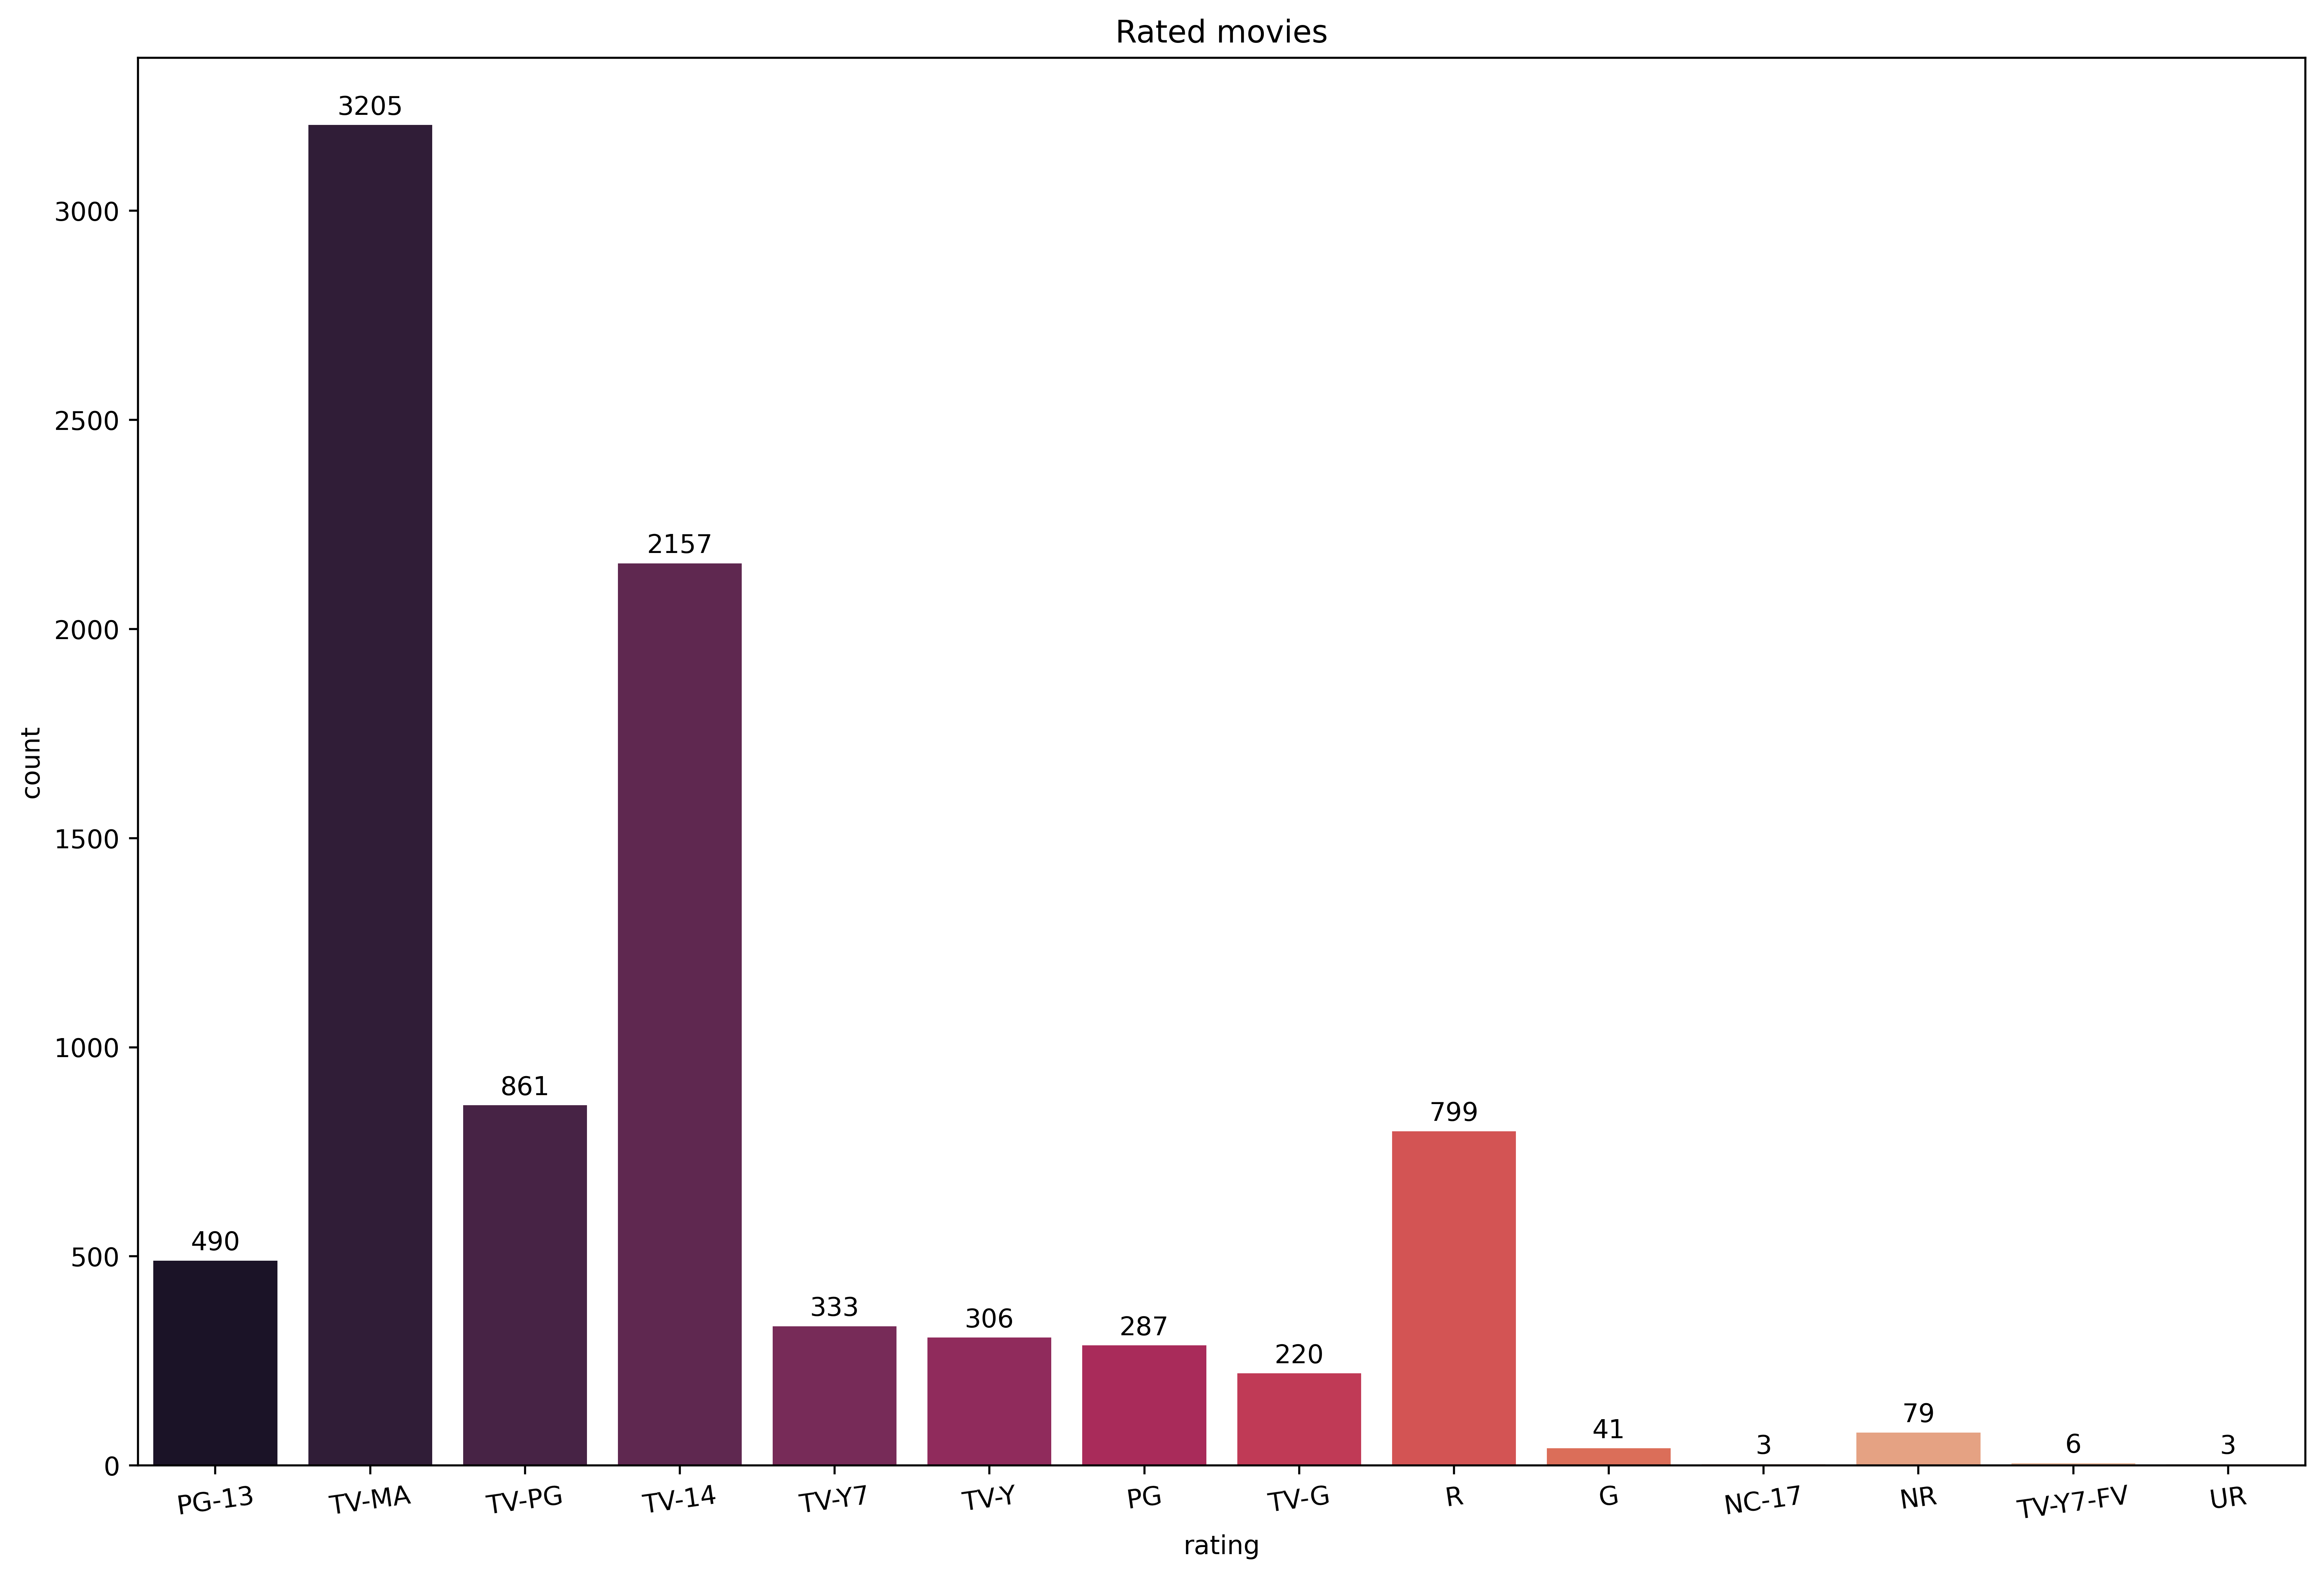

In [41]:
plt.figure(figsize=(15,10),dpi=500)
fig=sns.countplot(df['rating'],palette='rocket')
plt.title('Rated movies')
plt.xticks(rotation=8);
for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=2)

Checking the different types of movie per year and per month.

In [43]:
crime_tv_show=df[df['Movie_A']=='Crime TV Shows']

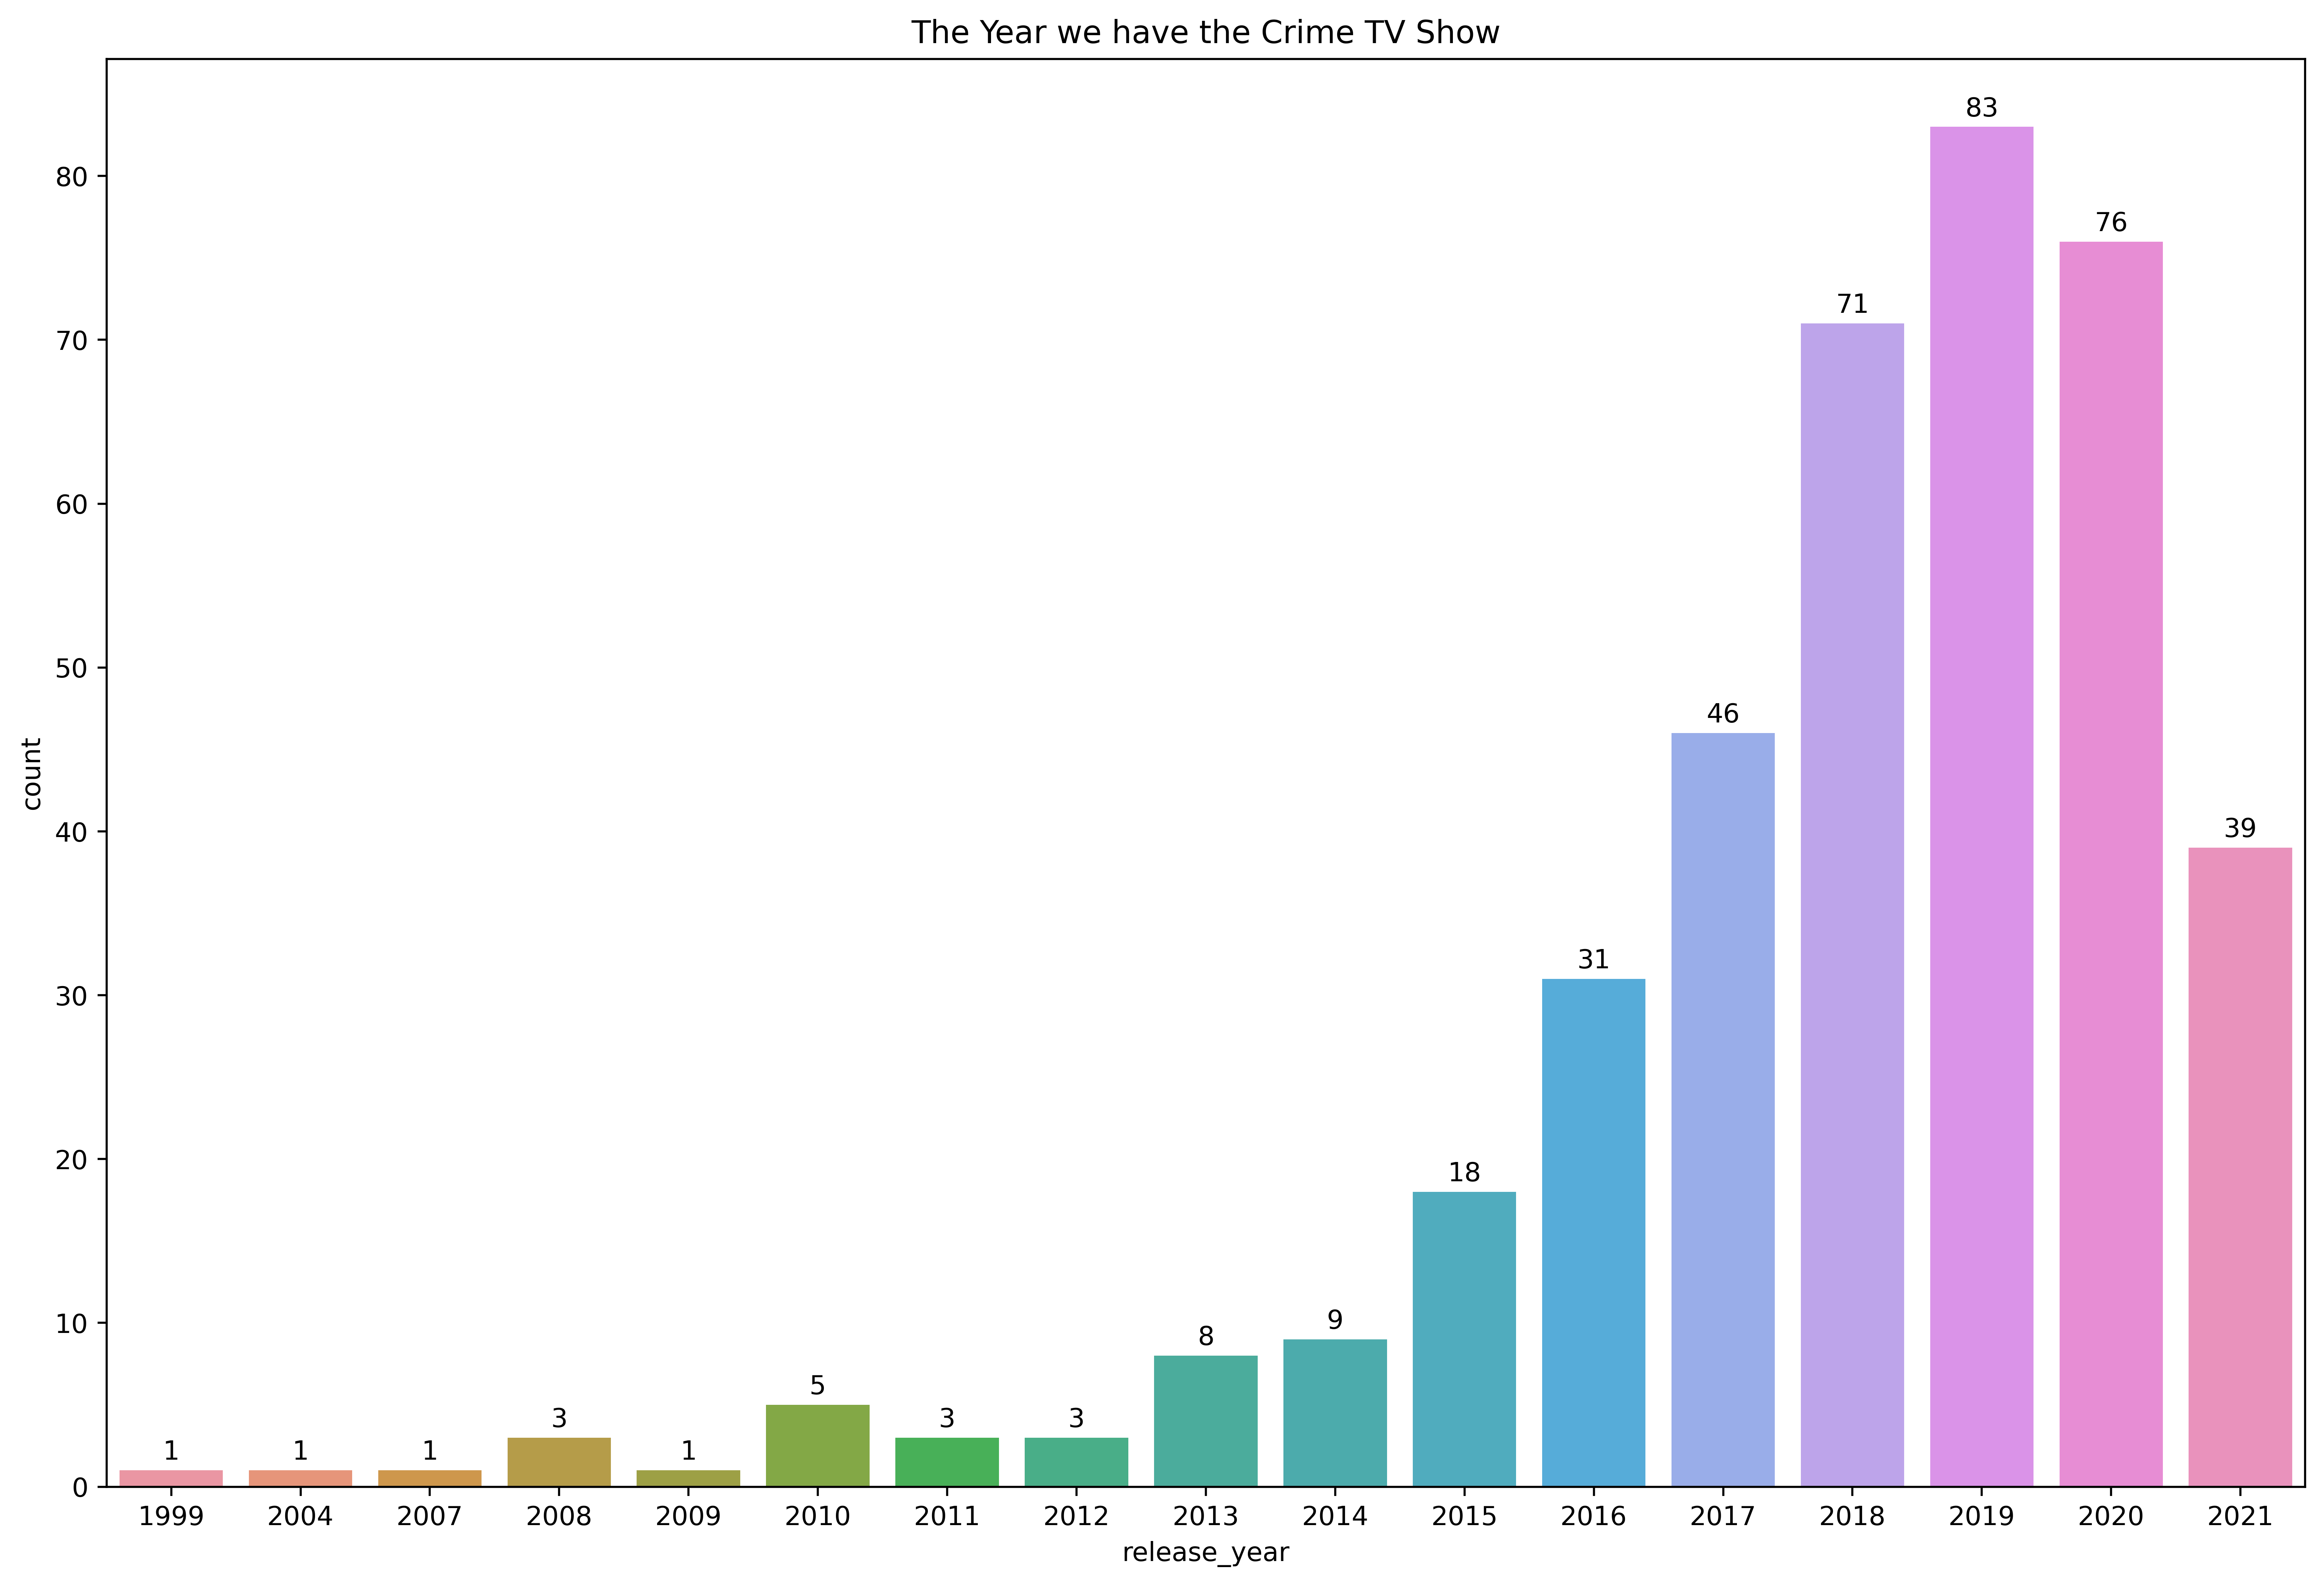

In [56]:
plt.figure(figsize=(15,10),dpi=500)
fig=sns.countplot(x=crime_tv_show['release_year'])
plt.title('The Year we have the Crime TV Show')
for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=2)

In [59]:
doc=df[df['listed_in']=='Documentaries']

doc

,show_id,Movie_type,title,director,country,Month_Name,release_year,rating,duration,listed_in,Movie_A,Movie_B,Movie_C
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,September,2020,PG-13,90 min,Documentaries,Documentaries,None,None
80,s46,Movie,My Heroes Were Cowboys,Tyler Greco,Not Given,September,2021,PG,23 min,Documentaries,Documentaries,None,None
110,s405,Movie,9to5: The Story of a Movement,Not Given,Pakistan,July,2021,TV-MA,85 min,Documentaries,Documentaries,None,None
115,s1071,Movie,Why Did You Kill Me?,Fredrick Munk,United States,April,2021,TV-MA,84 min,Documentaries,Documentaries,None,None
151,s718,Movie,Headspace: Unwind Your Mind,Not Given,Pakistan,June,2021,TV-G,273 min,Documentaries,Documentaries,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8278,s5805,Movie,Saudi Arabia Uncovered,Not Given,United Kingdom,September,2016,TV-14,52 min,Documentaries,Documentaries,None,None
8284,s5815,Movie,Real Crime: Supermarket Heist (Tesco Bomber),Not Given,United Kingdom,August,2010,TV-14,46 min,Documentaries,Documentaries,None,None
8313,s5919,Movie,Virunga: Gorillas in Peril,Not Given,United States,February,2015,TV-14,29 min,Documentaries,Documentaries,None,None
8586,s7611,Movie,NOVA: Killer Floods,Not Given,United States,July,2017,TV-PG,54 min,Documentaries,Documentaries,None,None


Text(0.5, 1.0, 'The Title Release Years')

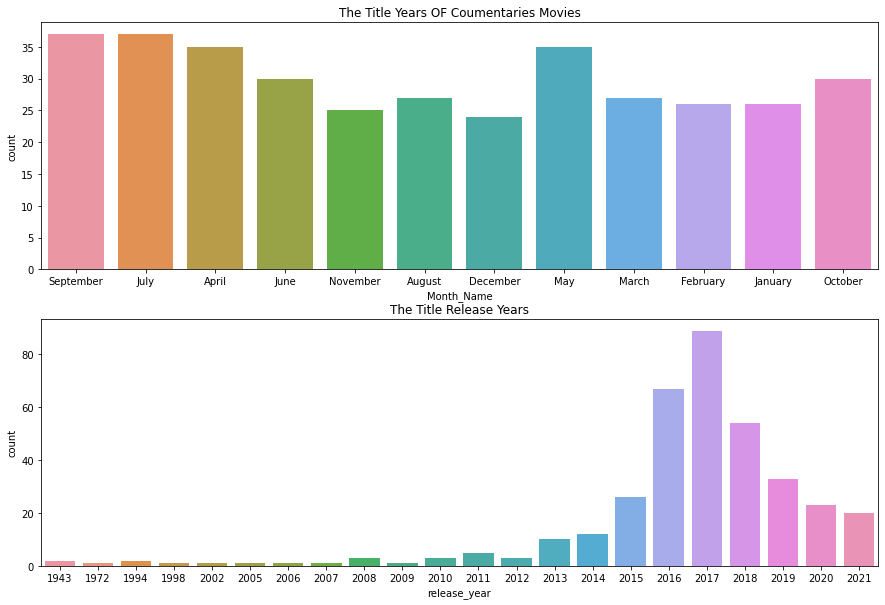

In [63]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.countplot(data=doc,x='Month_Name',ax=ax[0])
ax[0].set_title('The Title Years OF Coumentaries Movies')

sns.countplot(data=doc,x='release_year',ax=ax[1])
ax[1].set_title('The Title Release Years')


In [64]:
df.head(3)

,show_id,Movie_type,title,director,country,Month_Name,release_year,rating,duration,listed_in,Movie_A,Movie_B,Movie_C
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,September,2020,PG-13,90 min,Documentaries,Documentaries,None,None
1,s3,TV Show,Ganglands,Julien Leclercq,France,September,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,September,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries


In [65]:
country=df[df['country']=='United States']

country

,show_id,Movie_type,title,director,country,Month_Name,release_year,rating,duration,listed_in,Movie_A,Movie_B,Movie_C
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,September,2020,PG-13,90 min,Documentaries,Documentaries,None,None
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,September,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
4,s8,Movie,Sankofa,Haile Gerima,United States,September,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
6,s10,Movie,The Starling,Theodore Melfi,United States,September,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,None
13,s471,Movie,Bridgerton - The Afterparty,"Krysia Plonka, Kristian Mercado",United States,July,2021,TV-14,39 min,Movies,Movies,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,s8727,TV Show,When Calls the Heart,Not Given,United States,December,2017,TV-PG,5 Seasons,TV Dramas,TV Dramas,None,None
8777,s8748,TV Show,Winsanity,Not Given,United States,December,2016,TV-G,1 Season,Reality TV,Reality TV,None,None
8779,s8756,TV Show,Women Behind Bars,Not Given,United States,November,2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",Crime TV Shows,Docuseries,None
8782,s8781,TV Show,Yo-Kai Watch,Not Given,United States,April,2015,TV-Y7,1 Season,"Anime Series, Kids' TV",Anime Series,Kids' TV,None


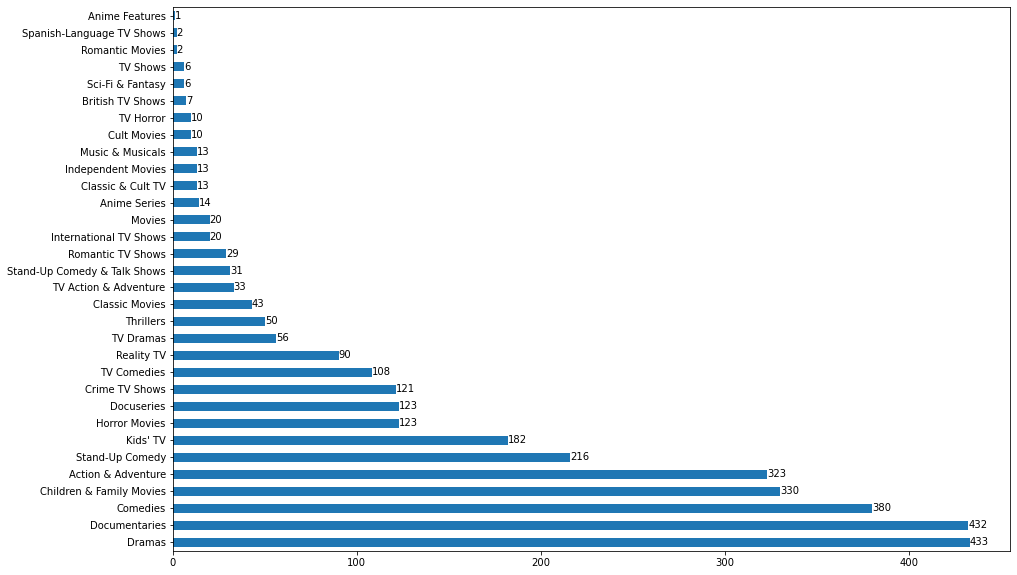

In [79]:
ax=[]
fig=[]
for x,y in Counter(df['release_year']).items():
    ax.append(x)
    fig.append(y)

plt_df=pd.DataFrame(list(zip(ax,fig)),columns=['Movie_A','release_year'])
ax=country['Movie_A'].value_counts().plot(kind='barh',figsize=(15,10));
plt.bar_label(ax.containers[0]);


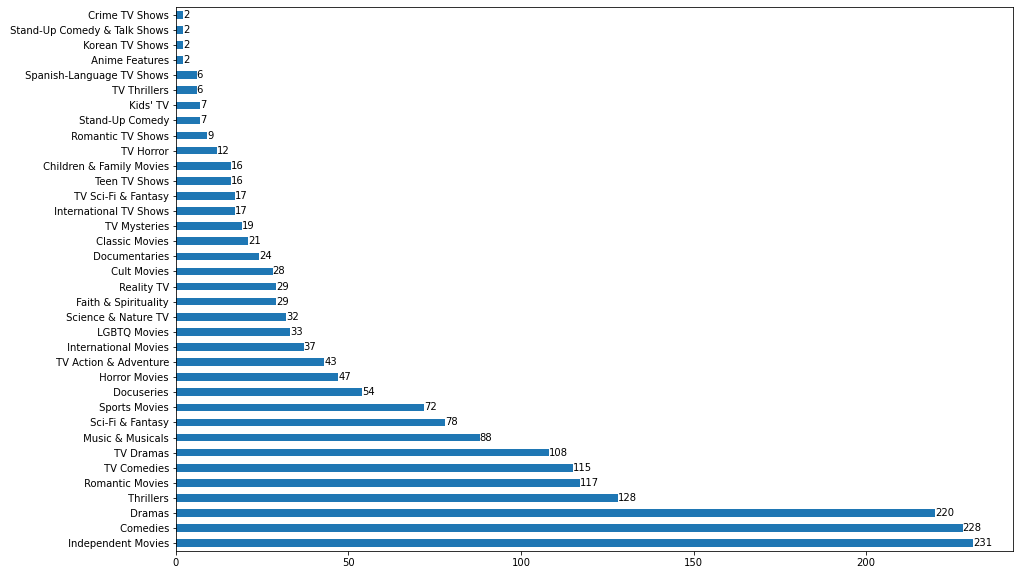

In [80]:
ax=[]
fig=[]
for x,y in Counter(df['release_year']).items():
    ax.append(x)
    fig.append(y)

plt_df=pd.DataFrame(list(zip(ax,fig)),columns=['Movie_A','release_year'])
ax=country['Movie_B'].value_counts().plot(kind='barh',figsize=(15,10));
plt.bar_label(ax.containers[0]);

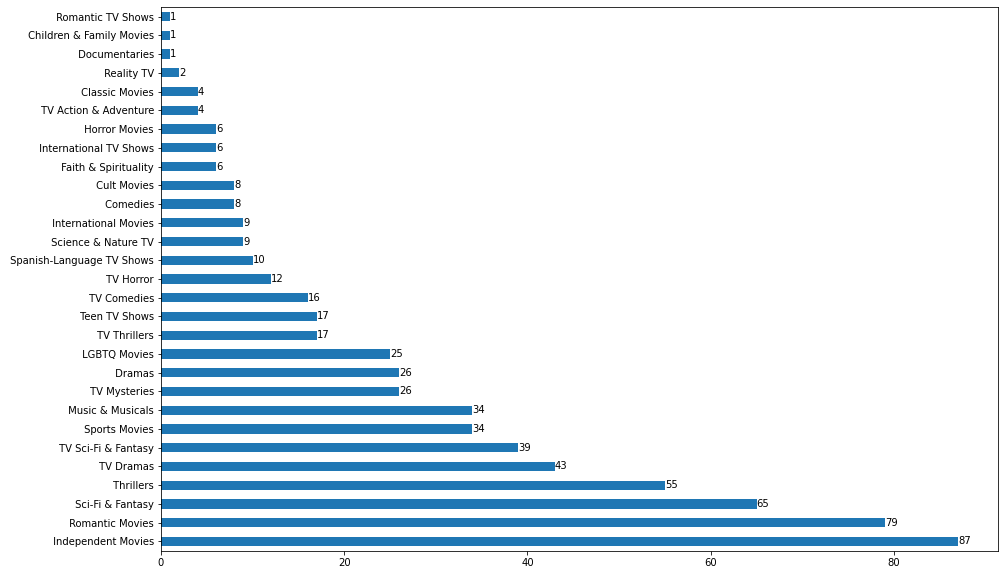

In [81]:
ax=[]
fig=[]
for x,y in Counter(df['release_year']).items():
    ax.append(x)
    fig.append(y)

plt_df=pd.DataFrame(list(zip(ax,fig)),columns=['Movie_A','release_year'])
ax=country['Movie_C'].value_counts().plot(kind='barh',figsize=(15,10));
plt.bar_label(ax.containers[0]);

In [89]:
df['duration'].nunique()

220

In [90]:
df['country'].nunique()

86

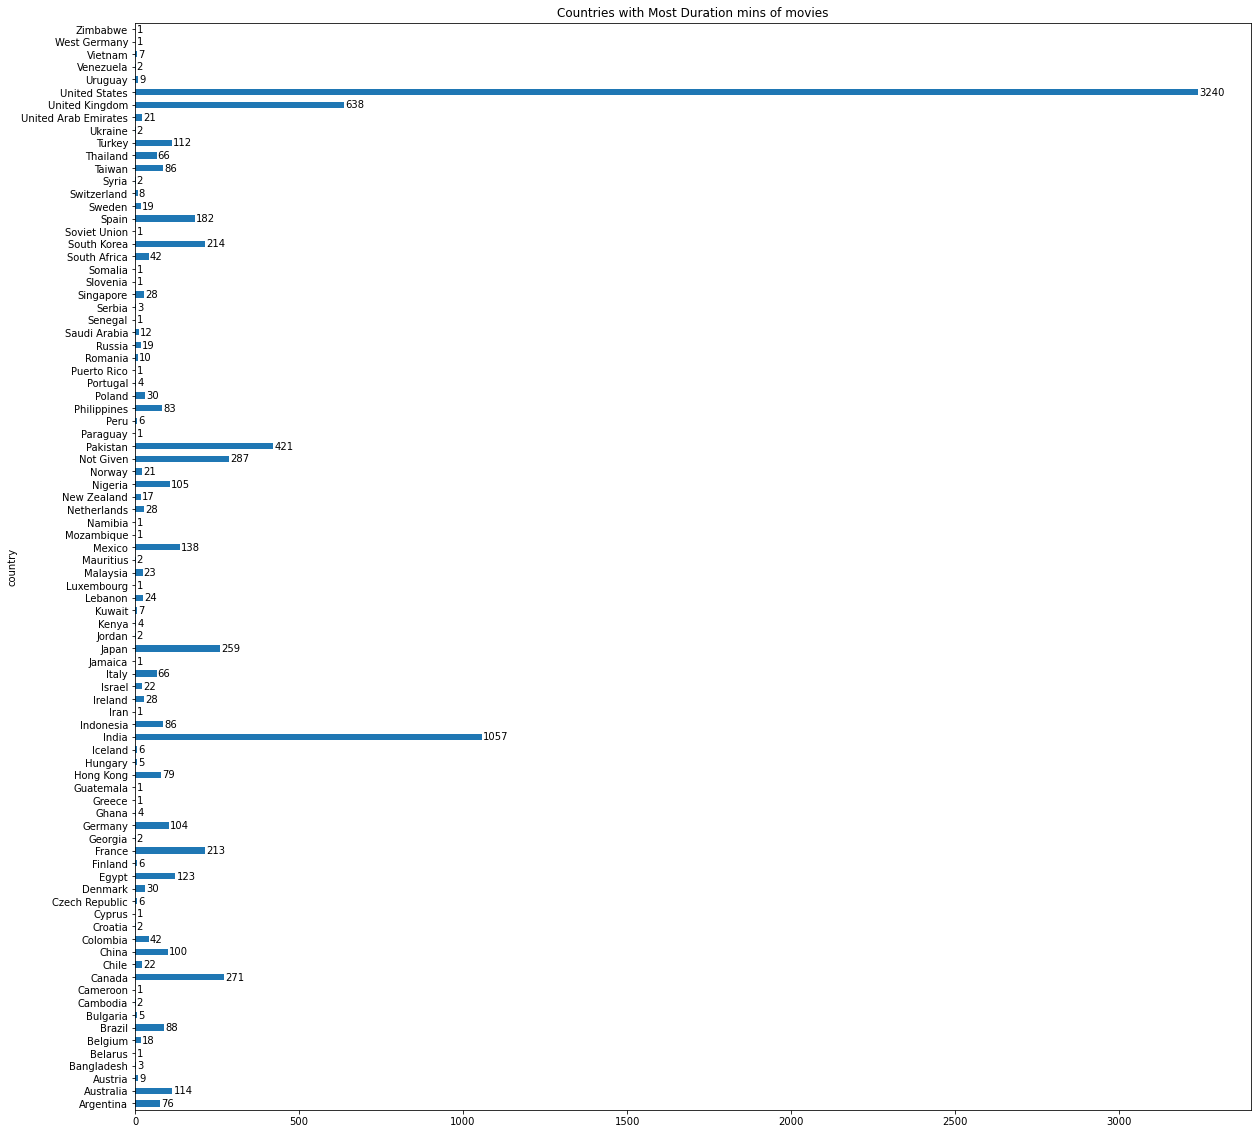

In [102]:
labels=df.groupby('country')['duration'].count().plot(kind='barh',figsize=(20,20))
plt.title('Countries with Most Duration mins of movies')
for container in labels.containers:
    labels.bar_label(container,label_type='edge',padding=1)

In [104]:
intl=df[df['listed_in']=='International Movies']

In [105]:
intl

,show_id,Movie_type,title,director,country,Month_Name,release_year,rating,duration,listed_in,Movie_A,Movie_B,Movie_C
1537,s1787,Movie,La Gran Ilusión,Antonio Díaz,Not Given,October,2016,TV-14,50 min,International Movies,International Movies,None,None
2589,s3377,Movie,My Next Guest with David Letterman and Shah Ru...,Michael Steed,Not Given,October,2019,TV-PG,61 min,International Movies,International Movies,None,None
3500,s4821,Movie,Derren Brown: Miracle,Not Given,United Kingdom,June,2018,TV-MA,74 min,International Movies,International Movies,None,None


<AxesSubplot:xlabel='release_year'>

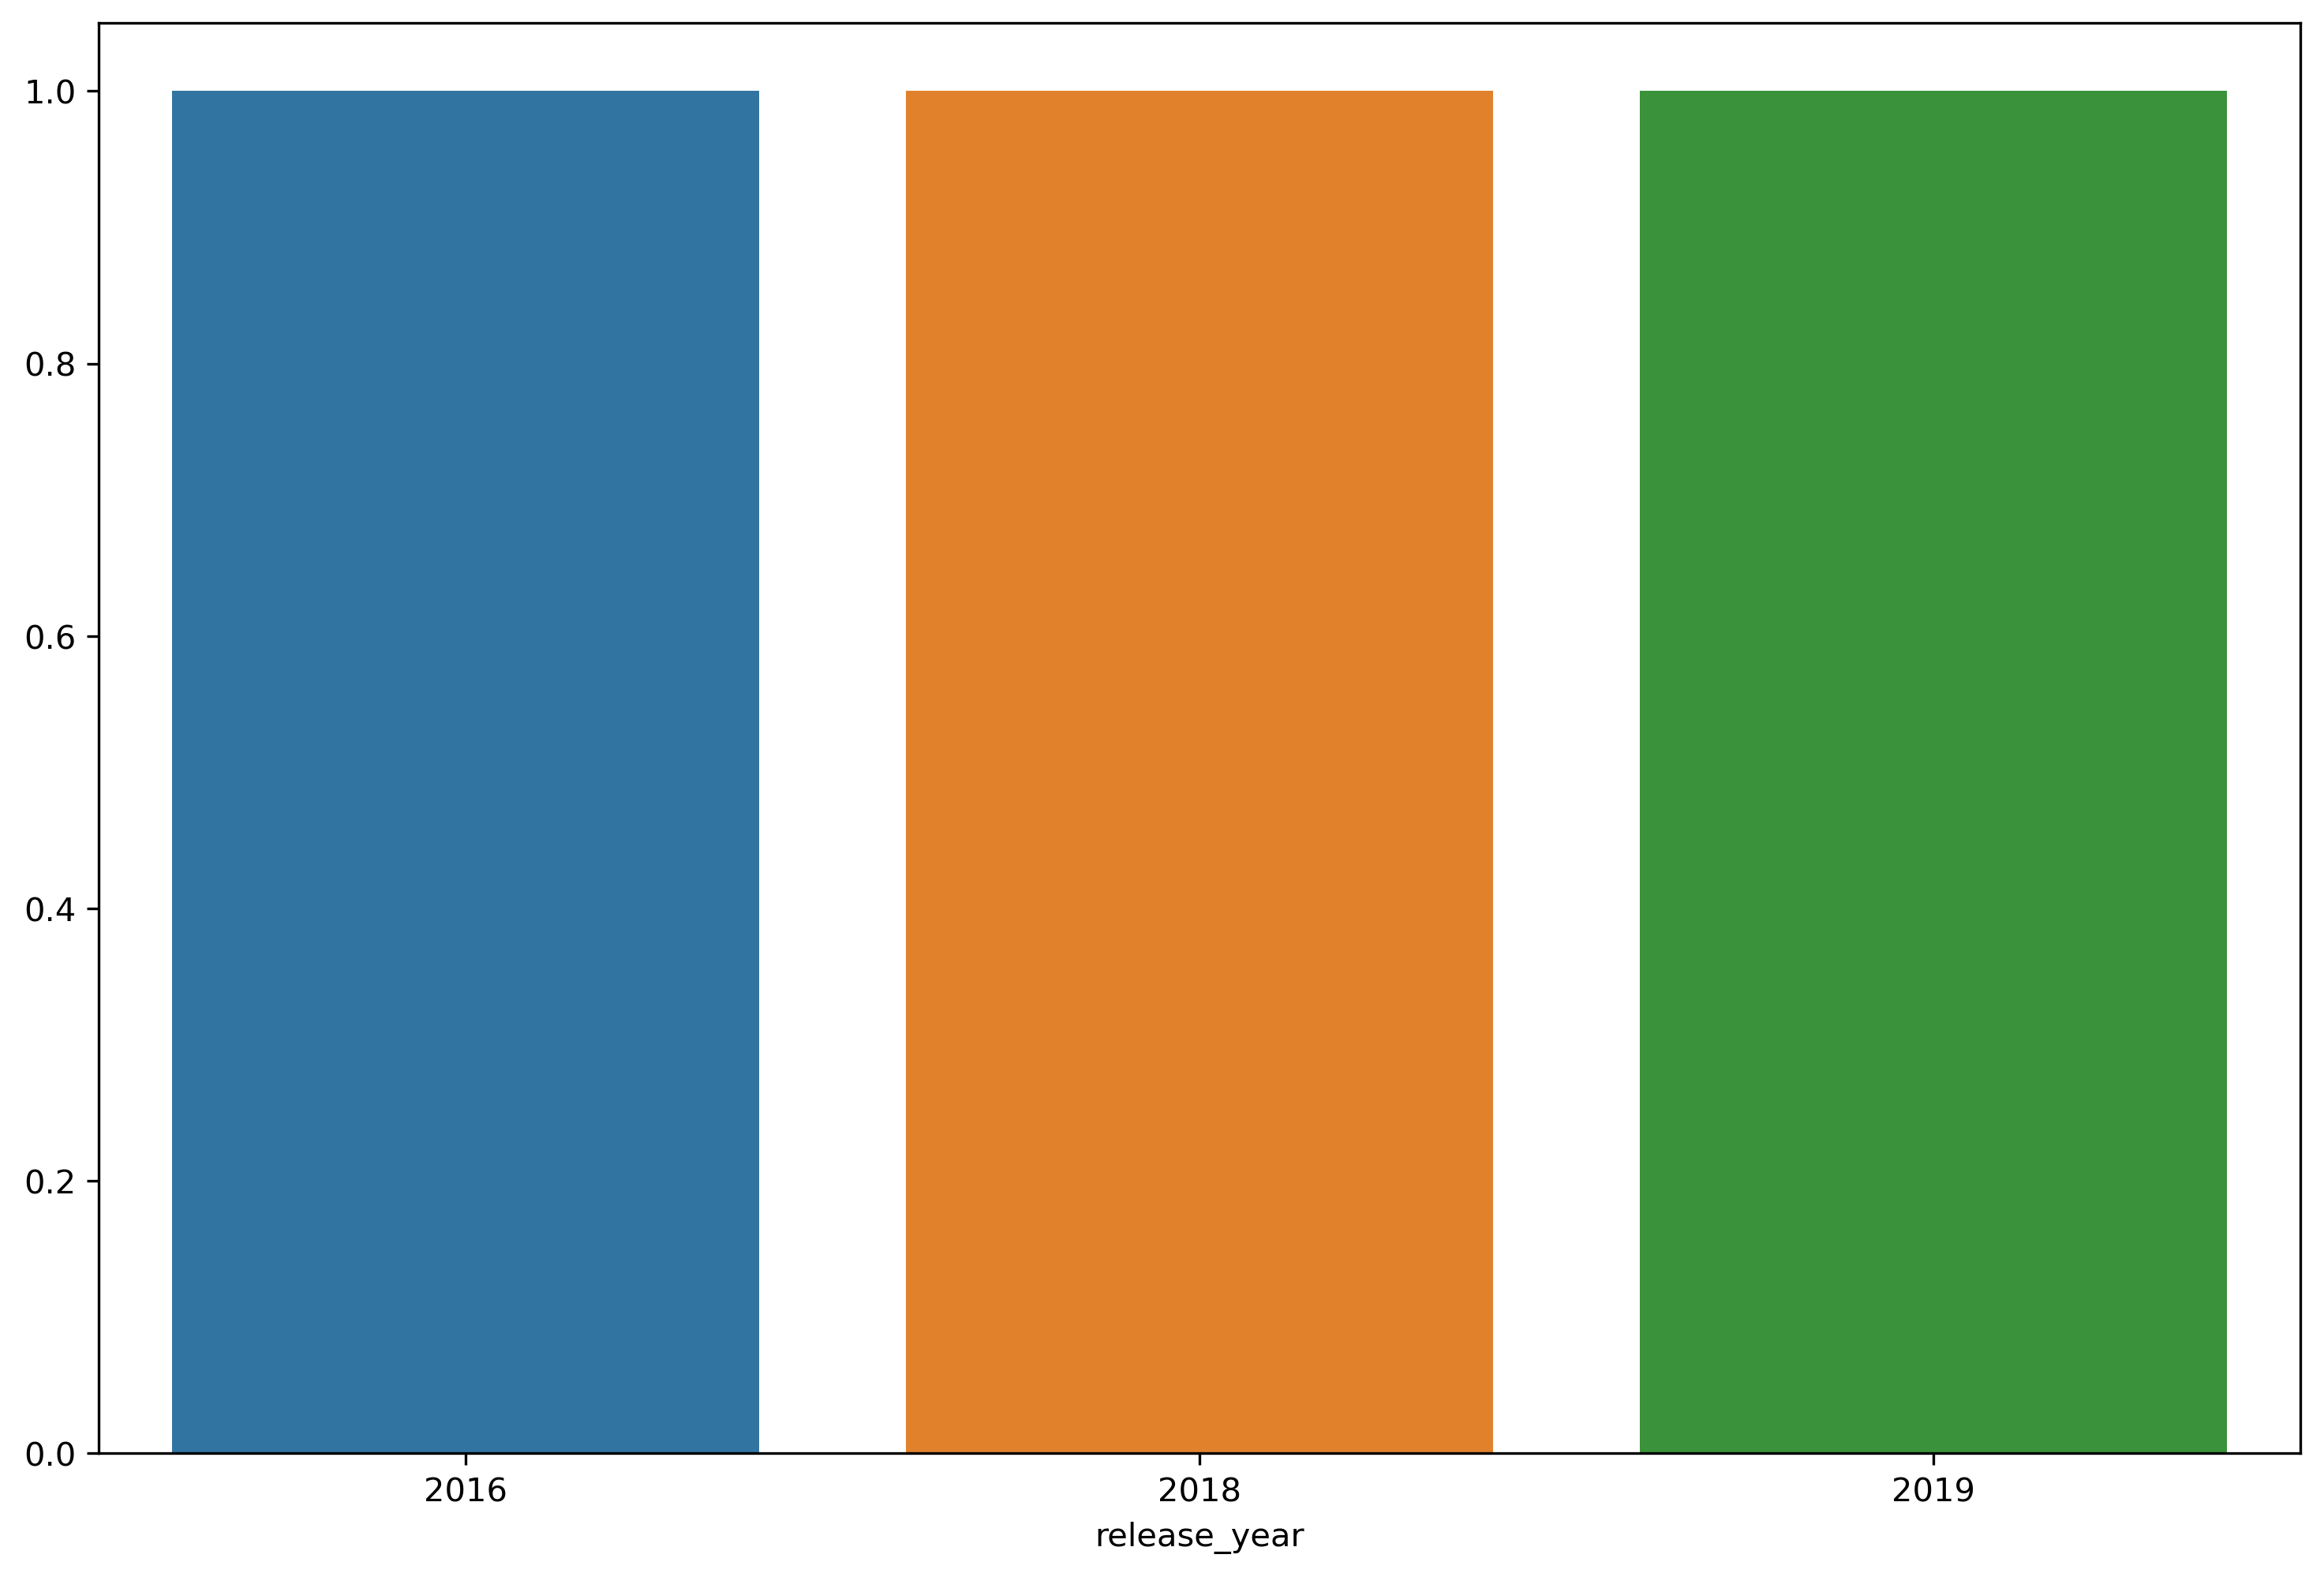

In [108]:
plt.figure(figsize=(12,8),dpi=300)
sns.barplot(x=intl['release_year'],y=intl['title'].value_counts().values)

In [109]:
df

,show_id,Movie_type,title,director,country,Month_Name,release_year,rating,duration,listed_in,Movie_A,Movie_B,Movie_C
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,September,2020,PG-13,90 min,Documentaries,Documentaries,None,None
1,s3,TV Show,Ganglands,Julien Leclercq,France,September,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,September,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,September,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,None
4,s8,Movie,Sankofa,Haile Gerima,United States,September,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,January,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows,TV Dramas,None
8786,s8798,TV Show,Zak Storm,Not Given,United States,September,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV,None,None
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,December,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas
8788,s8784,TV Show,Yoko,Not Given,Pakistan,June,2016,TV-Y,1 Season,Kids' TV,Kids' TV,None,None


In [112]:
chd=df[df['Movie_A']=='Children & Family Movies']

chd

,show_id,Movie_type,title,director,country,Month_Name,release_year,rating,duration,listed_in,Movie_A,Movie_B,Movie_C
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,September,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,None
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,May,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,May,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals",Children & Family Movies,Music & Musicals,None
10,s941,Movie,Motu Patlu: Deep Sea Adventure,Suhas Kadav,India,May,2014,TV-Y7,76 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,None
11,s942,Movie,Motu Patlu: Mission Moon,Suhas Kadav,India,May,2013,TV-Y7,71 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8585,s7600,Movie,NOVA: Bird Brain,Not Given,United States,July,2017,TV-G,53 min,"Children & Family Movies, Documentaries",Children & Family Movies,Documentaries,None
8625,s7776,Movie,Power Rangers Samurai: Clash of the Red Rangers,Not Given,United States,January,2011,TV-Y7,46 min,Children & Family Movies,Children & Family Movies,None,None
8627,s7781,Movie,Power Rangers Super Samurai: Stuck on Christmas,Not Given,United States,January,2012,TV-Y7,24 min,"Children & Family Movies, Sci-Fi & Fantasy",Children & Family Movies,Sci-Fi & Fantasy,None
8634,s7788,Movie,Power Rangers: Megaforce: Raising Spirits,Not Given,United States,January,2013,TV-Y7,24 min,Children & Family Movies,Children & Family Movies,None,None


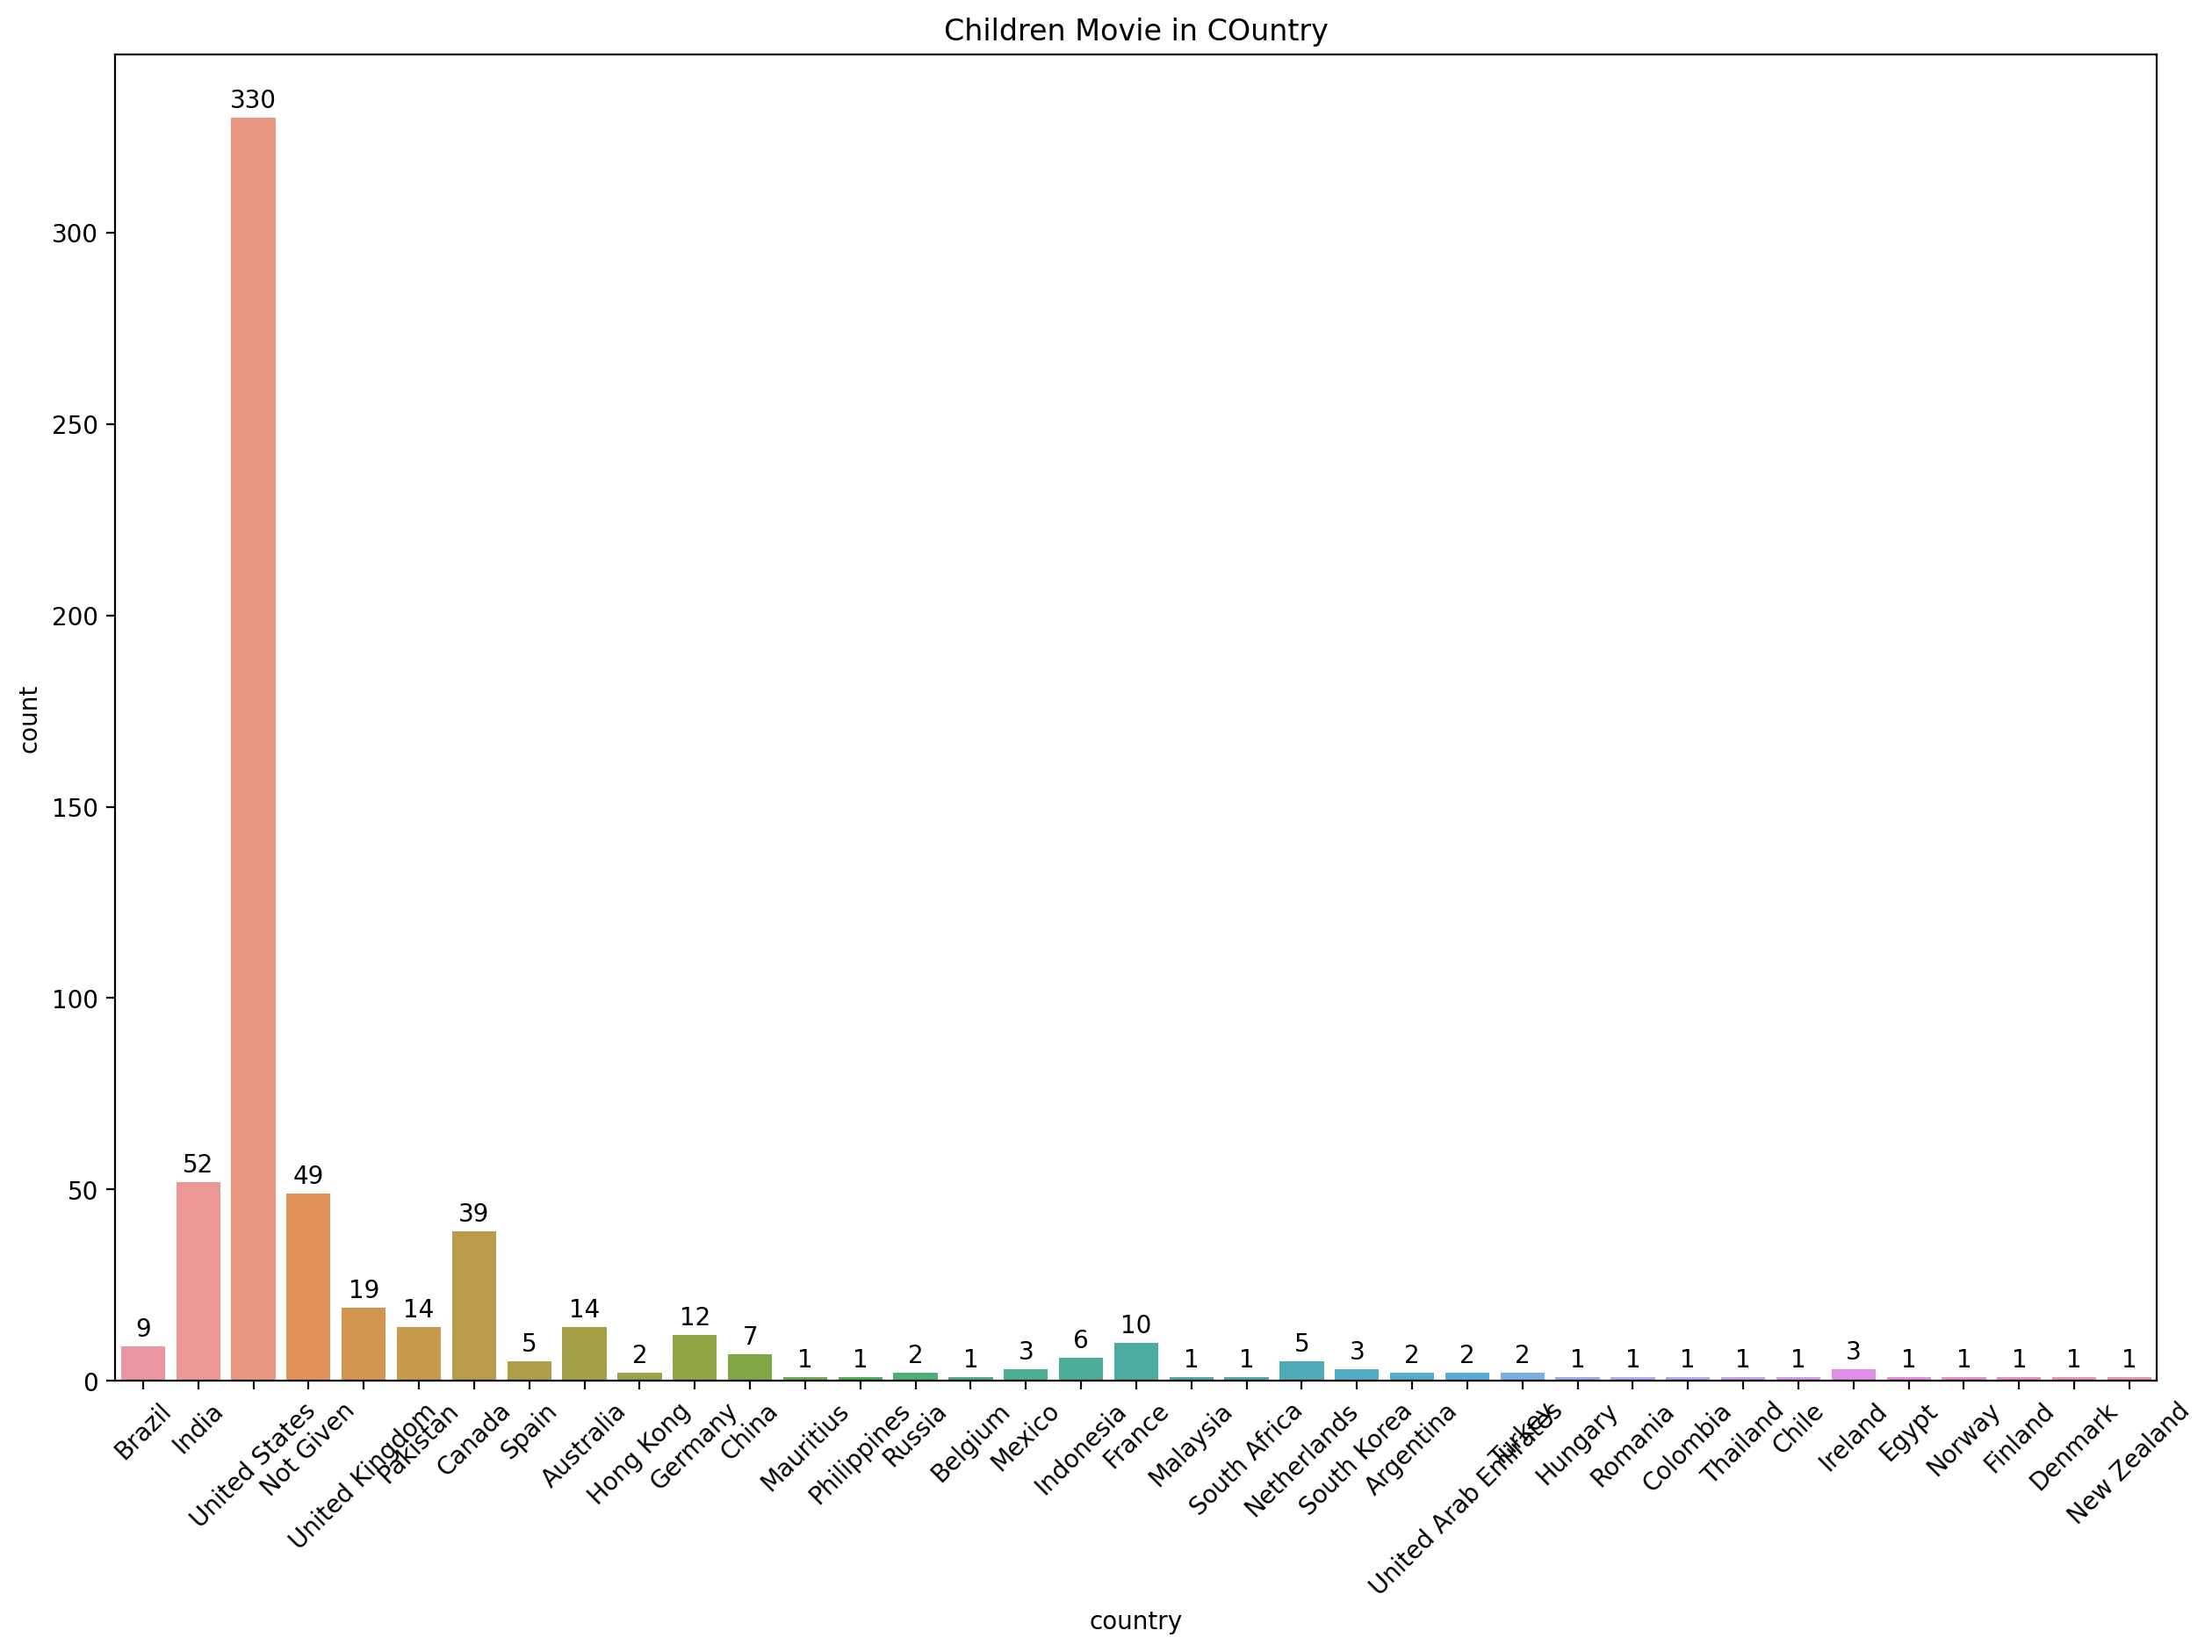

In [118]:
plt.figure(figsize=(15,10),dpi=200)
axx=sns.countplot(x=chd['country'])
plt.xticks(rotation=45);
plt.title('Children Movie in COuntry')
for container in axx.containers:
    axx.bar_label(container,label_type='edge',padding=2)
    

In [119]:
df.head(2)

,show_id,Movie_type,title,director,country,Month_Name,release_year,rating,duration,listed_in,Movie_A,Movie_B,Movie_C
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,September,2020,PG-13,90 min,Documentaries,Documentaries,None,None
1,s3,TV Show,Ganglands,Julien Leclercq,France,September,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure


In [ ]:
# 2008-2011 Netflix dataset shows that customers around the world watch two types of film, i.e., movies and the tv shows. 
# Customers subscribed more to movies than tv shows.
# The United States emerged as the leading country that releases the most films (32240) followed by India (1057). It also has the largest movie directors and with the highest customer subscriptions on Netflix.
# We created a column named month and discovered that customers around the world have the highest subscription in the month of July. 
# In conclusion, Netflix should sustain their large market in the United States by giving incentives to customers and commit to releasing the three kinds of movie they watch most which are independent movies, comedies and dramas.
